In [1]:
def model(t_u, w, b):
    return w*t_u +b

In [2]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p-t_c)**2
    return squared_diffs.mean()

In [3]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] 
t_c = torch.tensor(t_c) 
t_u = torch.tensor(t_u)

In [4]:
w = torch.ones(())
b = torch.zeros(())
w, b

(tensor(1.), tensor(0.))

In [5]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [7]:
x = torch.ones(()) 
y = torch.ones(3,1) 
z = torch.ones(1,3) 
a = torch.ones(2, 1, 1) 
print(f"shapes: x: {x.shape}, y: {y.shape}")


shapes: x: torch.Size([]), y: torch.Size([3, 1])


In [8]:
print(f" z: {z.shape}, a: {a.shape}") 
print("x * y:", (x * y).shape) 
print("y * z:", (y * z).shape) 
print("y * z * a:", (y * z * a).shape)

 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [9]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w+delta,b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [10]:
lr = 1e-2

w = w-lr*loss_rate_of_change_w

In [11]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [12]:
b = b - lr * loss_rate_of_change_b

In [13]:
def dloss_fn(t_p, t_c): 
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) 
    return dsq_diffs

In [14]:
def dmodel_dw(t_u, w, b): 
    return t_u

In [15]:
def dmodel_db(t_u, w, b): 
    return 1.0

In [16]:
def grad_fn(t_u, t_c,t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [22]:
# 循环训练

def training_loop(n_epochs, lr, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - lr * grad
        print(f'Epoch{epoch}, Loss {loss} params{params}')
    return params

In [23]:
training_loop(n_epochs=10, lr=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch1, Loss 1763.884765625 paramstensor([-44.1730,  -0.8260])
Epoch2, Loss 5802484.5 paramstensor([2568.4011,   45.1637])
Epoch3, Loss 19408029696.0 paramstensor([-148527.7344,   -2616.3931])
Epoch4, Loss 64915905708032.0 paramstensor([8589999.0000,  151310.8906])
Epoch5, Loss 2.1713052546105344e+17 paramstensor([-4.9680e+08, -8.7510e+06])
Epoch6, Loss 7.262575831529281e+20 paramstensor([2.8732e+10, 5.0610e+08])
Epoch7, Loss 2.429183416467663e+24 paramstensor([-1.6617e+12, -2.9270e+10])
Epoch8, Loss 8.125122549611731e+27 paramstensor([9.6102e+13, 1.6928e+12])
Epoch9, Loss 2.717688212084259e+31 paramstensor([-5.5580e+15, -9.7903e+13])
Epoch10, Loss 9.090110518901907e+34 paramstensor([3.2144e+17, 5.6621e+15])


tensor([3.2144e+17, 5.6621e+15])

In [24]:
training_loop(n_epochs=20, lr=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch1, Loss 1763.884765625 paramstensor([ 0.5483, -0.0083])
Epoch2, Loss 323.09051513671875 paramstensor([ 0.3623, -0.0118])
Epoch3, Loss 78.92963409423828 paramstensor([ 0.2858, -0.0135])
Epoch4, Loss 37.5528450012207 paramstensor([ 0.2543, -0.0143])
Epoch5, Loss 30.540283203125 paramstensor([ 0.2413, -0.0149])
Epoch6, Loss 29.351154327392578 paramstensor([ 0.2360, -0.0153])
Epoch7, Loss 29.148883819580078 paramstensor([ 0.2338, -0.0156])
Epoch8, Loss 29.113847732543945 paramstensor([ 0.2329, -0.0159])
Epoch9, Loss 29.107145309448242 paramstensor([ 0.2325, -0.0162])
Epoch10, Loss 29.105247497558594 paramstensor([ 0.2324, -0.0166])
Epoch11, Loss 29.104167938232422 paramstensor([ 0.2323, -0.0169])
Epoch12, Loss 29.103221893310547 paramstensor([ 0.2323, -0.0172])
Epoch13, Loss 29.102294921875 paramstensor([ 0.2323, -0.0175])
Epoch14, Loss 29.10137939453125 paramstensor([ 0.2323, -0.0178])
Epoch15, Loss 29.100465774536133 paramstensor([ 0.2323, -0.0181])
Epoch16, Loss 29.09954833984375 p

tensor([ 0.2323, -0.0196])

In [29]:
params= training_loop(n_epochs=5000, lr=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u*0.1, t_c=t_c)

Epoch1, Loss 80.36434173583984 paramstensor([1.7761, 0.1064])
Epoch2, Loss 37.574913024902344 paramstensor([2.0848, 0.1303])
Epoch3, Loss 30.871076583862305 paramstensor([2.2094, 0.1217])
Epoch4, Loss 29.756193161010742 paramstensor([2.2616, 0.1004])
Epoch5, Loss 29.507152557373047 paramstensor([2.2853, 0.0740])
Epoch6, Loss 29.3924560546875 paramstensor([2.2978, 0.0458])
Epoch7, Loss 29.298828125 paramstensor([2.3059, 0.0168])
Epoch8, Loss 29.208717346191406 paramstensor([ 2.3122, -0.0124])
Epoch9, Loss 29.119415283203125 paramstensor([ 2.3178, -0.0417])
Epoch10, Loss 29.030488967895508 paramstensor([ 2.3232, -0.0710])
Epoch11, Loss 28.941877365112305 paramstensor([ 2.3284, -0.1003])
Epoch12, Loss 28.853565216064453 paramstensor([ 2.3336, -0.1295])
Epoch13, Loss 28.765552520751953 paramstensor([ 2.3388, -0.1587])
Epoch14, Loss 28.6778507232666 paramstensor([ 2.3439, -0.1878])
Epoch15, Loss 28.590431213378906 paramstensor([ 2.3491, -0.2169])
Epoch16, Loss 28.503318786621094 paramstenso

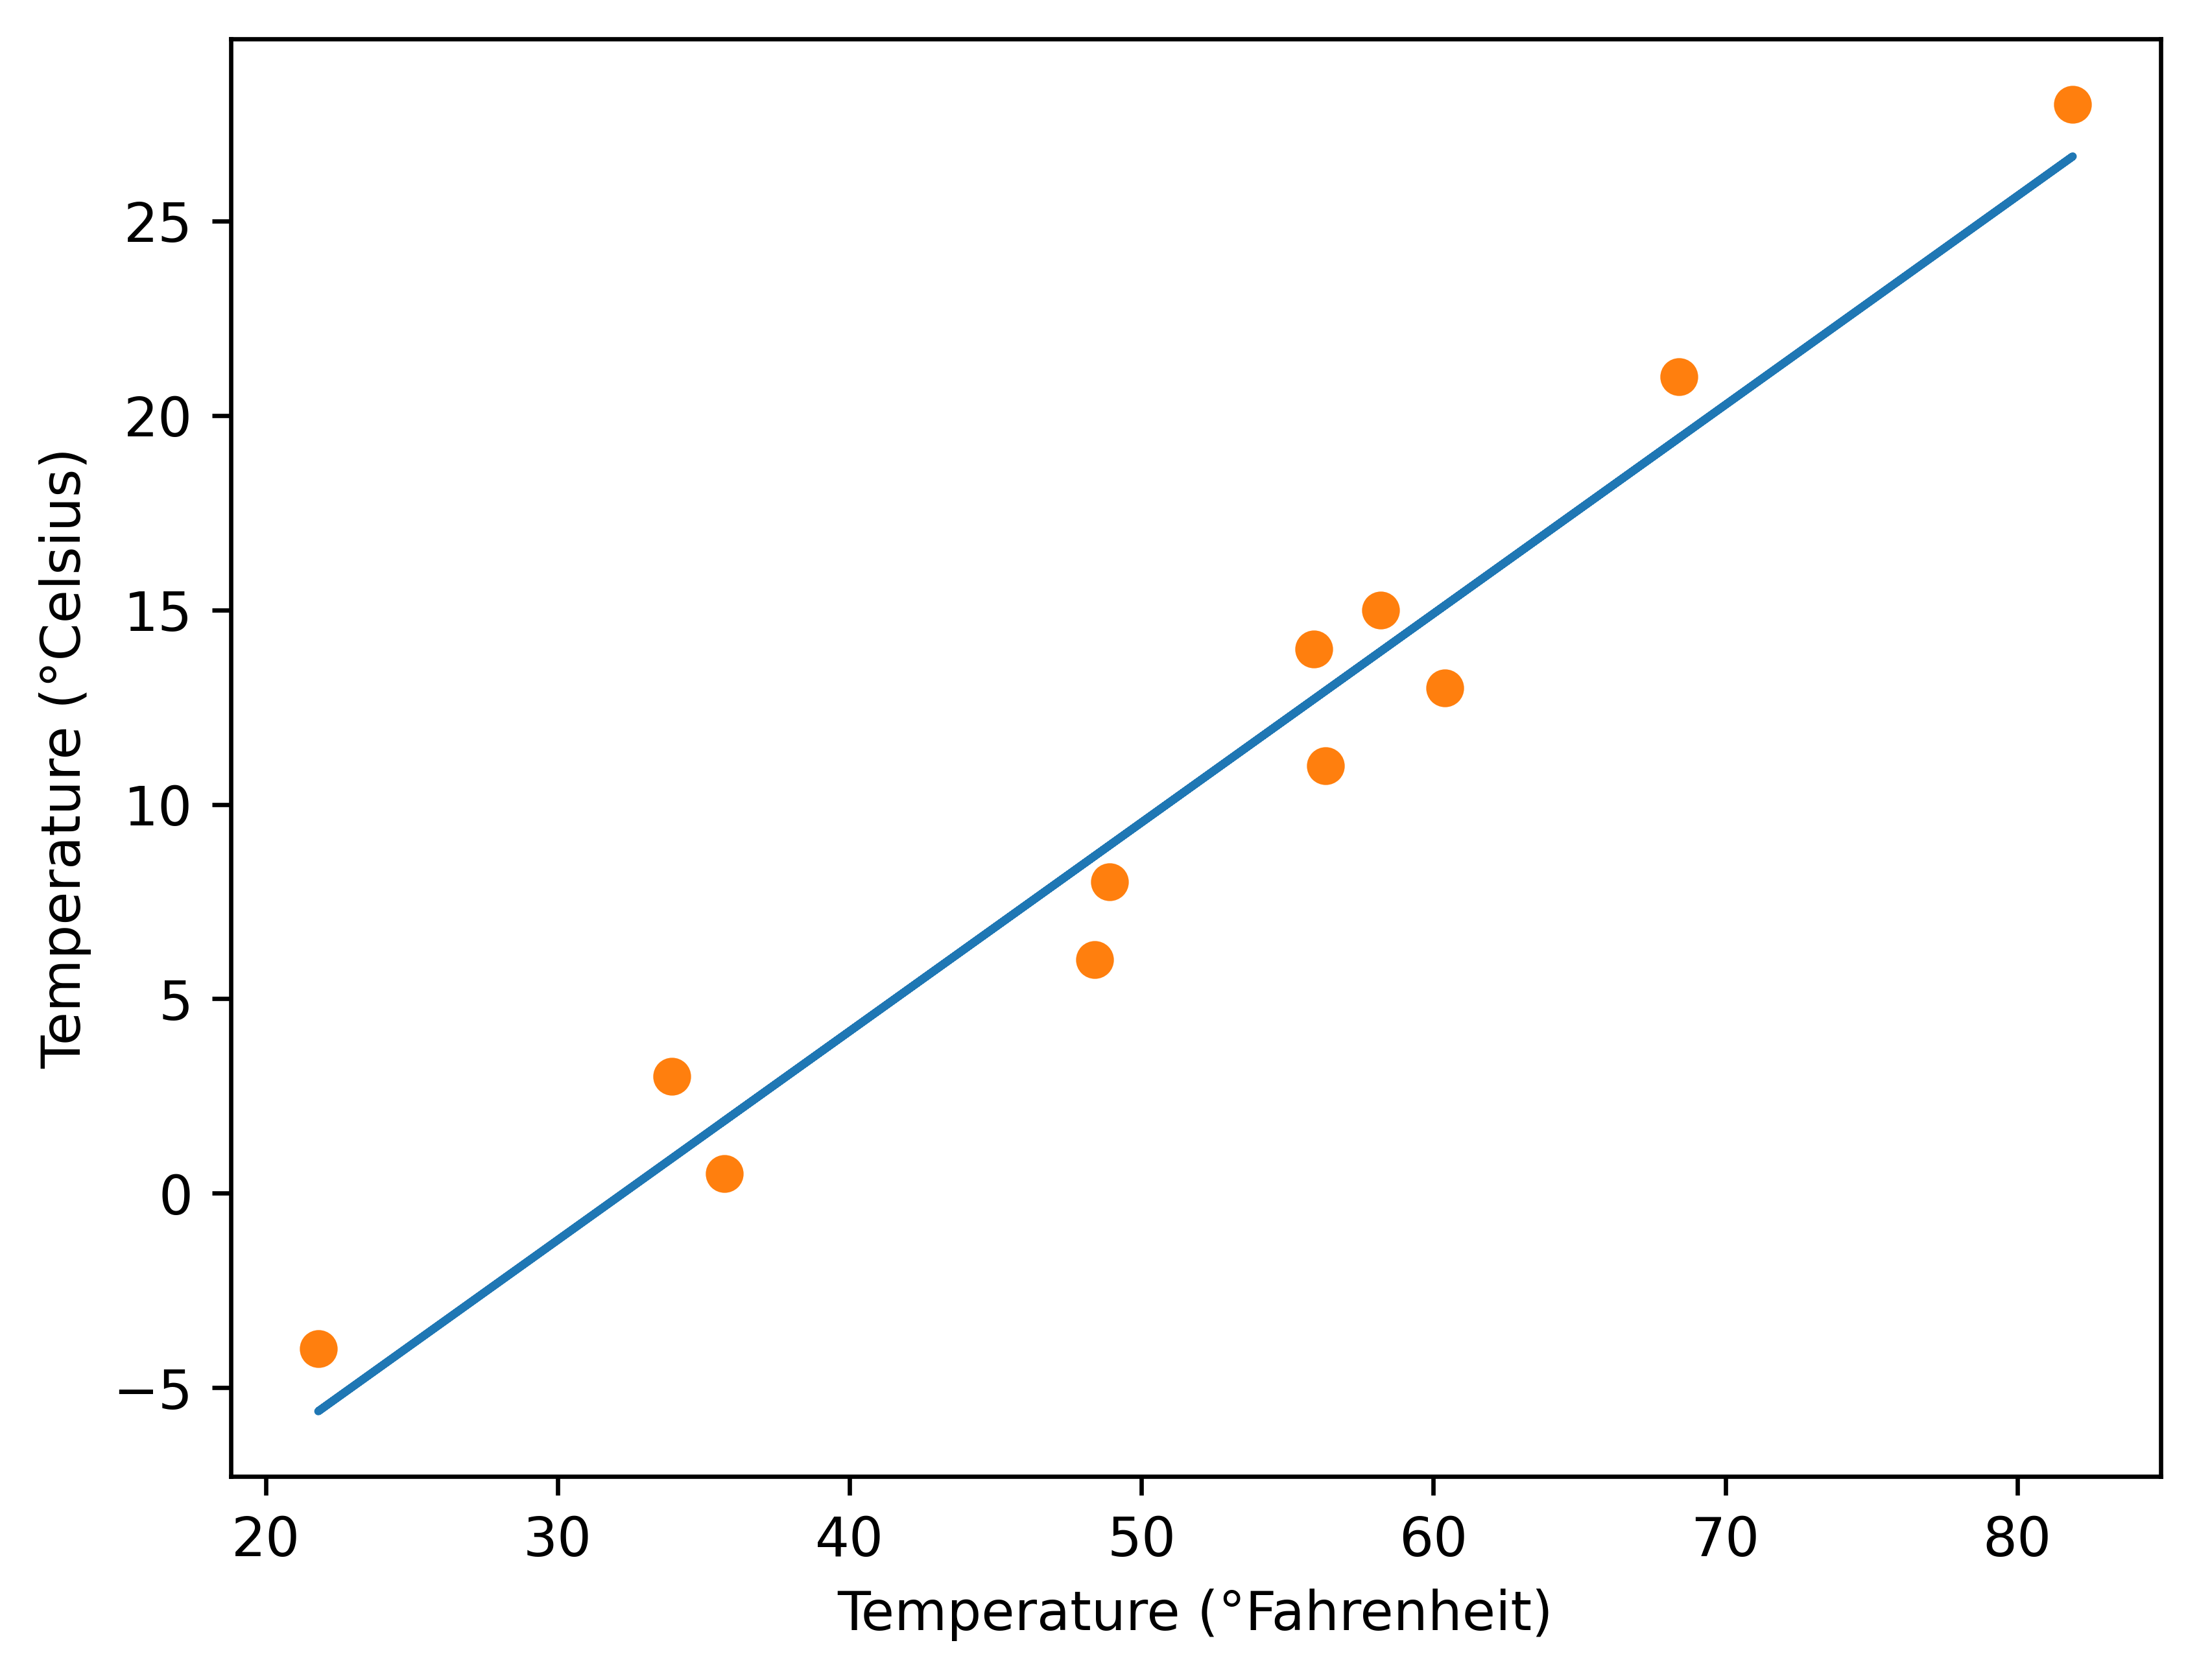

In [30]:
from matplotlib import pyplot as plt

t_p = model(t_u *0.1, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)") 
plt.ylabel("Temperature (°Celsius)") 
plt.plot(t_u.numpy(), t_p.detach().numpybbbbb()) 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [33]:
params1 = torch.tensor([1.0, 0.0], requires_grad=True)

In [34]:
loss1 = loss_fn(model(t_u, *params1), t_c)
loss1.backward()

params1.grad

tensor([4517.2969,   82.6000])

In [35]:
if params1.grad is not None:
    params1.grad.zero_()

In [40]:
def training_loop_1(n_epochs, lr, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if epoch %500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [42]:
training_loop_1(n_epochs=5000, lr=1e-2, params=torch.tensor([1.0, 0.0], requires_grad=True), t_u=t_u*0.1, t_c=t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [43]:
from torch import optim

In [54]:
optimizer = optim.SGD([params1], lr=1e-2)

In [55]:
def training_loop2(n_epochs, optimizer, params, t_u, t_c): 
     for epoch in range(1, n_epochs + 1): 
         t_p = model(t_u, *params) 
         loss = loss_fn(t_p, t_c) 
         optimizer.zero_grad() 
         loss.backward() 
         optimizer.step() 
         if epoch % 500 == 0: 
             print('Epoch %d, Loss %f' % (epoch, float(loss))) 
     return params

In [56]:
training_loop2(n_epochs=5000, optimizer=optimizer, params=params1, t_u=t_u*0.1, t_c=t_c)

Epoch 500, Loss 7.973795
Epoch 1000, Loss 3.849305
Epoch 1500, Loss 3.095983
Epoch 2000, Loss 2.958392
Epoch 2500, Loss 2.933261
Epoch 3000, Loss 2.928672
Epoch 3500, Loss 2.927833
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927654
Epoch 5000, Loss 2.927646


tensor([  5.3671, -17.3012], requires_grad=True)